**Task-03**

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Loading data
bank = pd.read_csv("/content/task 03_dataset.csv", sep=';')

In [ ]:
# Data Exploration
print("First 5 rows of the dataset:")
print(bank.head())

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

In [ ]:
print("\nDataset shape:")
print(bank.shape)


Dataset shape:
(41188, 21)


In [ ]:
print("\nDataset information:")
print(bank.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [ ]:
print("\nStatistical Analysis:")
print(bank.describe())


Statistical Analysis:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.57

In [ ]:
print("\nChecking Missing values:")
print(bank.isnull().sum())


Checking Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
print("\nChecking for duplicates:")
print(bank.duplicated().sum())



Checking for duplicates:
12


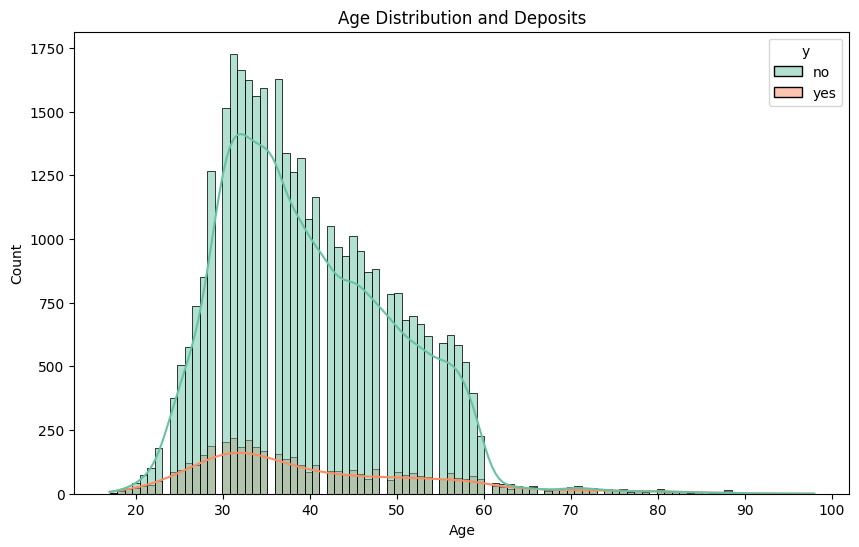

In [ ]:
# Data Visualization
# Age Distribution and Deposits
plt.figure(figsize=(10, 6))
sns.histplot(x="age", data=bank, kde=True, hue="y", palette='Set2')  # Setting palette to 'Set2'
plt.title("Age Distribution and Deposits")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Each bar represents a range of ages, and the height of each bar indicates the number of individuals falling within that age range. The data is further divided into two groups based on whether the individuals made a deposit or not. The color difference between the bars represents this distinction. The x-axis represents different age ranges, and the y-axis indicates the count of individuals.

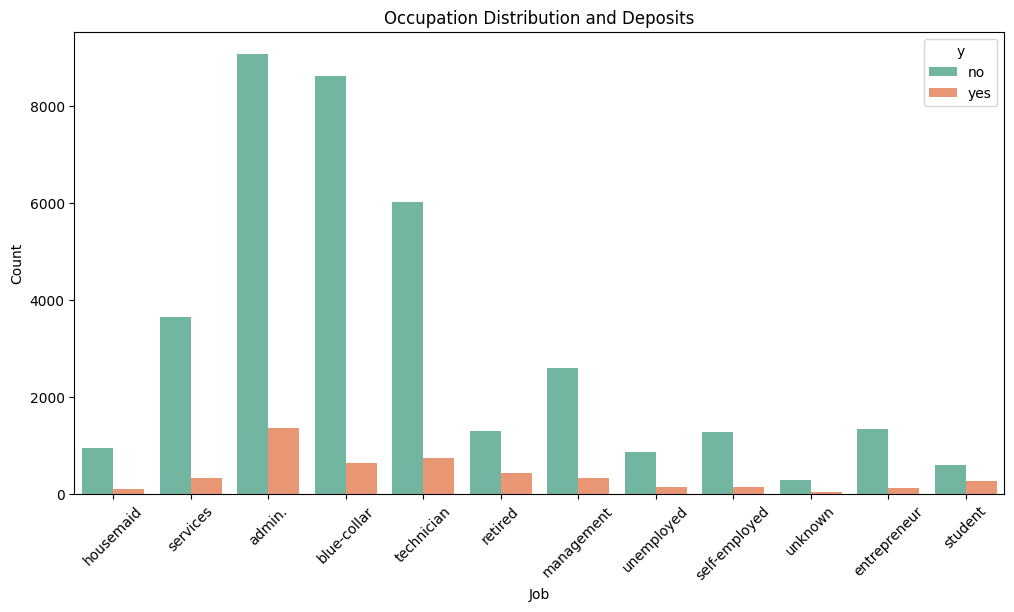

In [ ]:
# Occupation Distribution and Deposits
plt.figure(figsize=(12, 6))
sns.countplot(x="job", data=bank, hue="y", palette='Set2')  # Setting palette to 'Set3'
plt.title("Occupation Distribution and Deposits")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


 Each bar represents a specific job category, and the height of the bar indicates the count of individuals belonging to that occupation. The data is further categorized based on whether the individuals made a deposit or not, distinguished by different colors for each category. The y-axis represents the count of individuals and the x-axis labels are rotated for better readability.

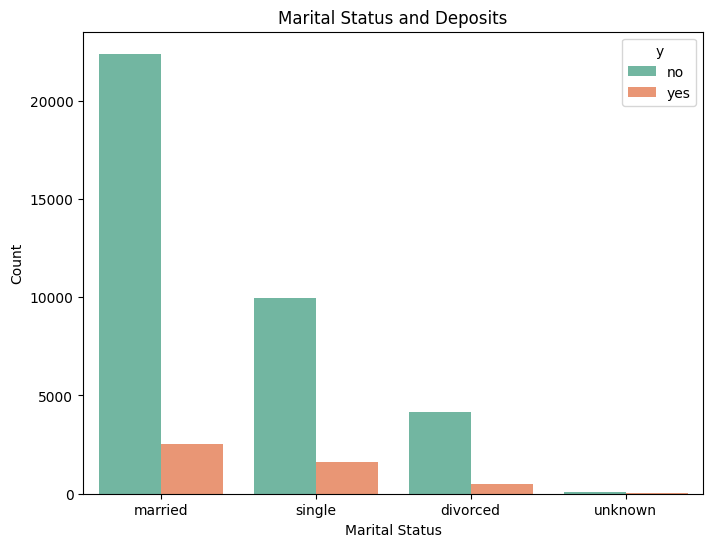

In [ ]:
# Marital Status and Deposits
plt.figure(figsize=(8, 6))
sns.countplot(x="marital", data=bank, hue="y", palette='Set2')  # Setting palette to 'Set3'
plt.title("Marital Status and Deposits")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


The height of each bar represents the count of individuals falling into that marital status category. The data is further categorized based on whether the individuals made a deposit or not, with different colors used to distinguish between the two categories. The x-axis represents different marital status categories, and the y-axis represents the count of individuals.

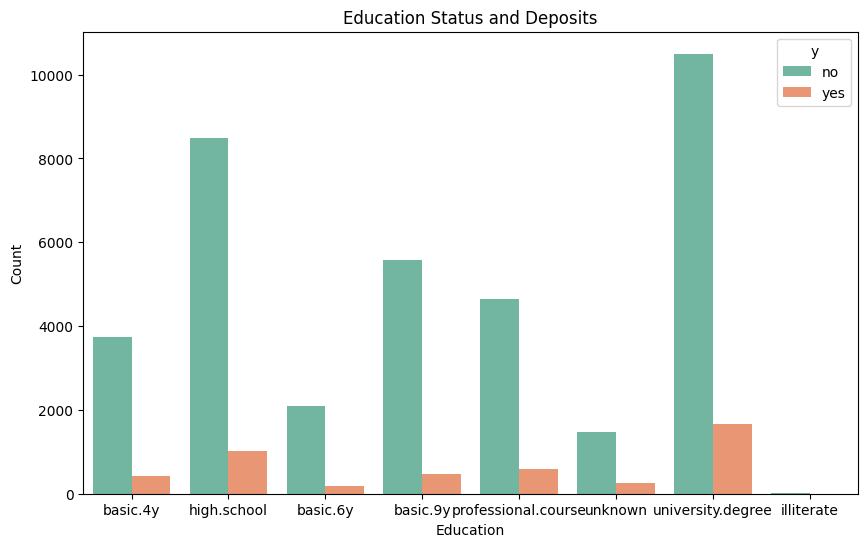

In [ ]:
# Education Status and Deposits
plt.figure(figsize=(10, 6))
sns.countplot(x="education", data=bank, hue="y", palette='Set2')  # Setting palette to 'Set2'
plt.title("Education Status and Deposits")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()


Each bar represents a specific education level (e.g., primary, secondary, tertiary). The height of each bar indicates the count of individuals with that education level. The data is further categorized based on whether the individuals made a deposit or not, with different colors used to distinguish between the two categories. The x-axis represents different education levels, and the y-axis represents the count of individuals.

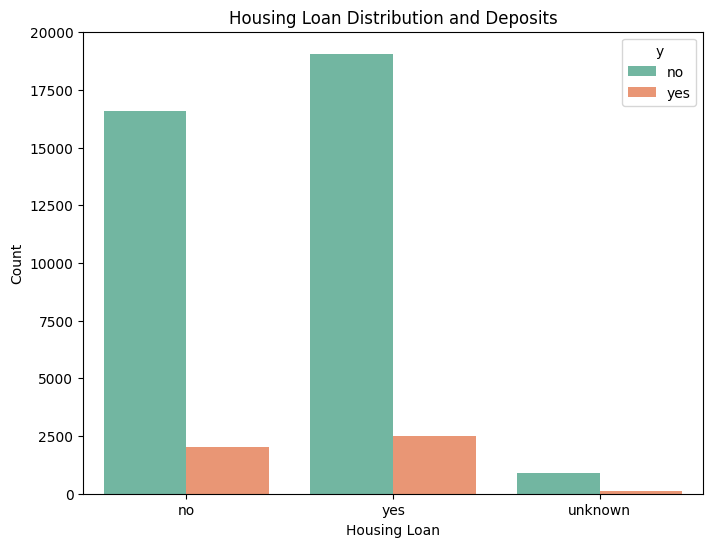

In [ ]:
# Housing Loan Distribution and Deposits
plt.figure(figsize=(8, 6))
sns.countplot(x="housing", data=bank, hue="y", palette='Set2')  # Setting palette to 'Set2'
plt.title("Housing Loan Distribution and Deposits")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.show()


Each bar represents a specific category of housing loan (e.g., having a housing loan or not having one). The height of each bar indicates the count of individuals falling into that category. The data is further categorized based on whether the individuals made a deposit or not, with different colors used to distinguish between the two categories. The x-axis represents different housing loan categories, and the y-axis represents the count of individuals.

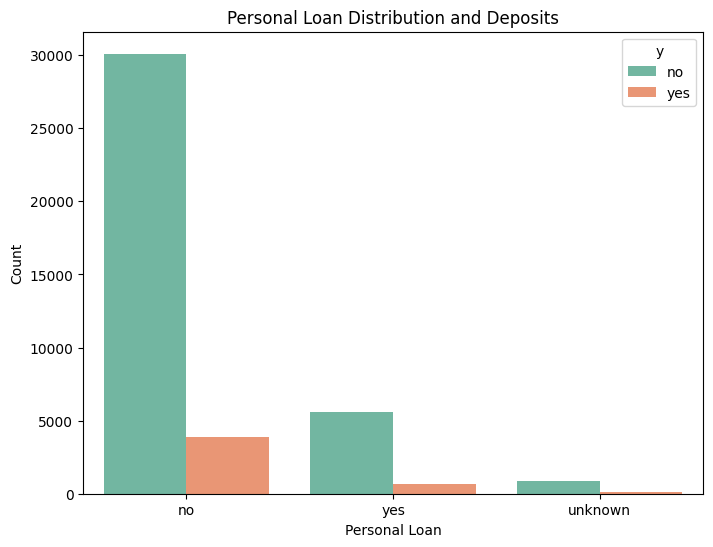

In [ ]:
# Personal Loan Distribution and Deposits
plt.figure(figsize=(8, 6))
sns.countplot(x="loan", data=bank, hue="y", palette='Set2')  # Setting palette to 'Set2'
plt.title("Personal Loan Distribution and Deposits")
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.show()


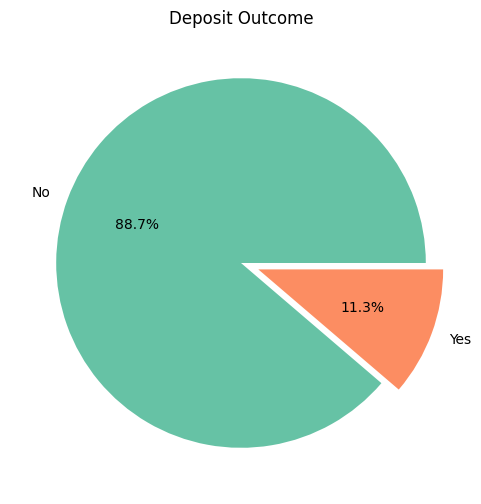

In [ ]:
# Pie chart for Outcome
plt.figure(figsize=(6, 6))
colors = sns.color_palette('Set2')  # Get colors from 'Set2' palette
bank.y.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.1], labels=['No', 'Yes'], colors=colors)
plt.title('Deposit Outcome')
plt.ylabel('')
plt.show()



Each bar represents a specific category of personal loan (e.g., having a personal loan or not having one). The height of each bar indicates the count of individuals falling into that category. The data is further categorized based on whether the individuals made a deposit or not, with different colors used to distinguish between the two categories. The x-axis represents different personal loan categories, and the y-axis represents the count of individuals.







<ipython-input-18-beb65cf50631>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank.corr(), cmap='viridis', annot=True, fmt=".2f")  # Using 'viridis' palette


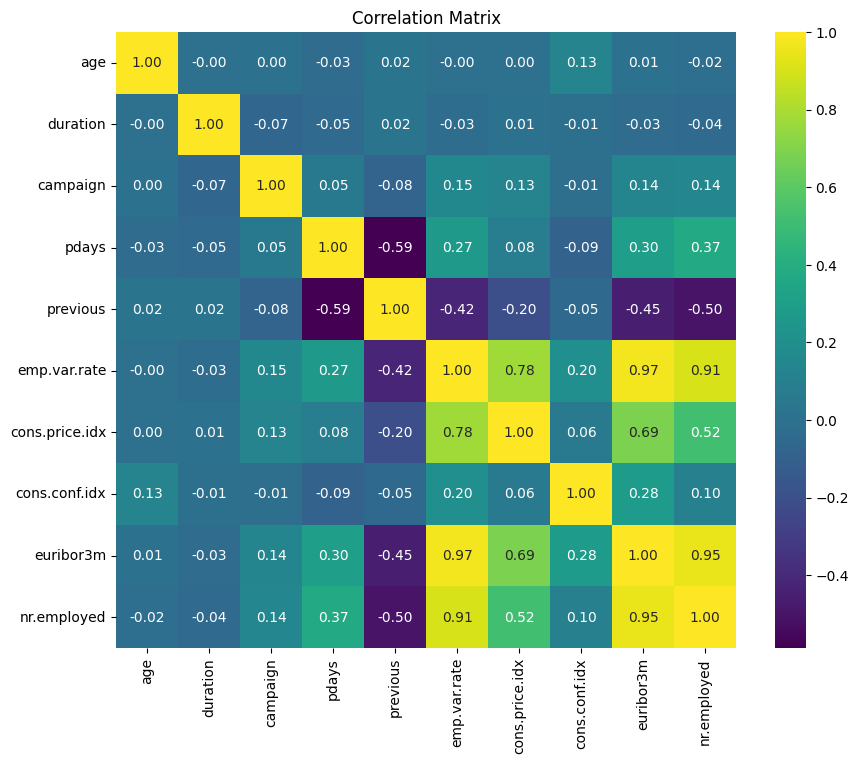

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(bank.corr(), cmap='viridis', annot=True, fmt=".2f")  # Using 'viridis' palette
plt.title("Correlation Matrix")
plt.show()




Each cell in the heatmap represents the correlation coefficient between two variables. The color of each cell indicates the strength and direction of the correlation: warmer colors (such as yellow) represent positive correlations, while cooler colors (such as green) represent negative correlations. The annotations within the cells show the correlation coefficient values, rounded to two decimal places, making it easier to interpret.







In [ ]:
# Data Preprocessing
cols = bank.select_dtypes("object").columns
le = LabelEncoder()
bank[cols] = bank[cols].apply(le.fit_transform)

In [ ]:
# Train-test split
X = bank.drop("y", axis=1)
y = bank.y
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)


In [ ]:
# Model Training and Evaluation
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
print('Train Score: {:.2f}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {:.2f}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.00
Test Score: 0.89


In [ ]:
cross_val = cross_val_score(decision_tree, train_X, train_y, cv=5).mean()
print('Cross Validation Score: {:.2f}'.format(cross_val))

Cross Validation Score: 0.89


In [ ]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y, ypred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11013
           1       0.47      0.52      0.50      1344

    accuracy                           0.89     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [ ]:
# Grid Search CV for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9, 10, 20]
}

In [ ]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [ ]:
print("Best Parameters:", gscv.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}


In [ ]:
best_decision_tree = gscv.best_estimator_
cross_val_best = cross_val_score(best_decision_tree, train_X, train_y, cv=5).mean()
print('Cross Validation Score with Best Estimator: {:.2f}'.format(cross_val_best))

Cross Validation Score with Best Estimator: 0.92


In [ ]:
# Model Evaluation with Best Estimator
best_decision_tree.fit(train_X, train_y)
print('\nTrain Score with Best Estimator: {:.2f}'.format(best_decision_tree.score(train_X, train_y)))
print('Test Score with Best Estimator: {:.2f}'.format(best_decision_tree.score(test_X, test_y)))


Train Score with Best Estimator: 0.92
Test Score with Best Estimator: 0.91


In [ ]:
ypred_best = best_decision_tree.predict(test_X)
print(classification_report(test_y, ypred_best))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11013
           1       0.60      0.49      0.54      1344

    accuracy                           0.91     12357
   macro avg       0.77      0.72      0.74     12357
weighted avg       0.90      0.91      0.91     12357



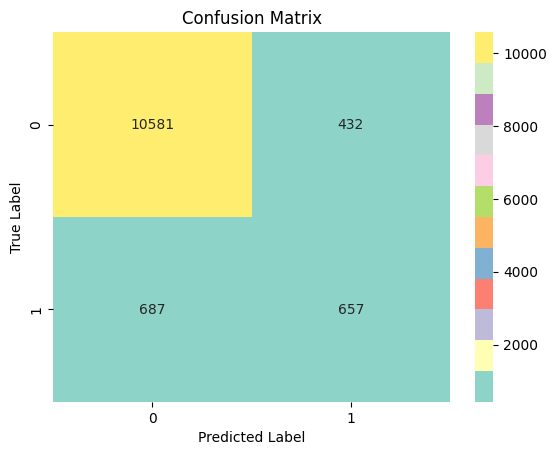

In [ ]:
# Confusion Matrix
cm = confusion_matrix(test_y, ypred_best)
sns.heatmap(cm, cmap='Set3', annot=True, fmt="d", xticklabels=best_decision_tree.classes_, yticklabels=best_decision_tree.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In this visualization, the rows represent the true labels (actual classes) of the data, while the columns represent the predicted labels (classes predicted by the model). Each cell in the heatmap shows the count of instances where the true label and the predicted label coincide. The color intensity of each cell indicates the frequency of these instances: darker colors represent higher counts. Annotations within the cells display the exact counts, making it easier to interpret.The x-axis represents the predicted labels and the y-axis represents the true labels.

In [ ]:
# Accuracy Score
accuracy = accuracy_score(test_y, ypred_best)
print("Test Accuracy of Decision Tree Classifier: {:.2f}%".format(accuracy * 100))

Test Accuracy of Decision Tree Classifier: 90.94%


In [ ]:
# Cross Validation Score
cross_val = cross_val_score(best_decision_tree, test_X, test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree: {:.2f}%".format(cross_val * 100))

Cross-Validation Accuracy Scores Decision Tree: 90.59%


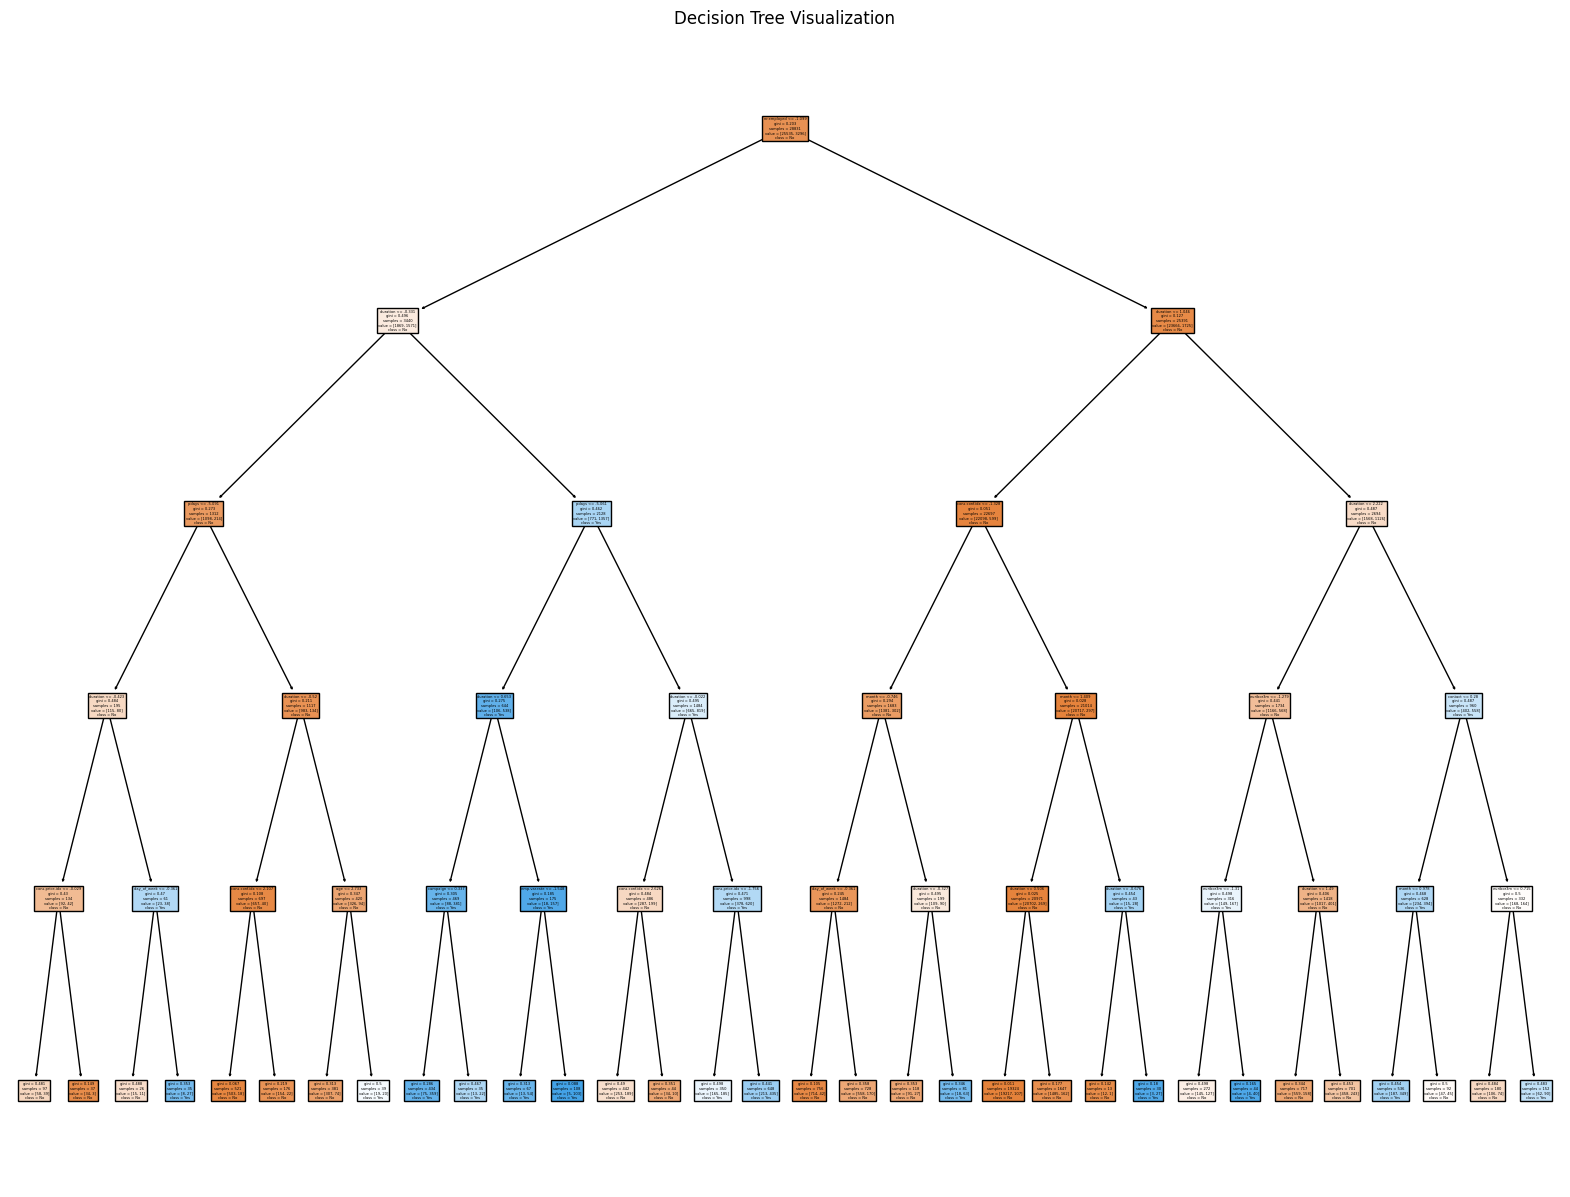

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot Decision Tree
plt.figure(figsize=(20, 15))
tree.plot_tree(best_decision_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()


 Each node in the decision tree represents a condition based on a feature of the dataset. The filled areas of the tree nodes represent the majority class within that node, while the branches depict the decisions made based on the feature values.







In [ ]:
plt.savefig("decision_tree_visualization.pdf")  # Save the plot as a PDF file

<Figure size 640x480 with 0 Axes>